In [56]:
# 그래프를 쥬피터 노트북 안에 그리기 위해 설정
%matplotlib inline

#필요한 패키지와 라이브러리를 가져옴
import numpy as np 
import pandas as pd 
import os #운영체제에서 제공되는 여러 기능 수행 예)파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때

# 시각화 관련 툴
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 

In [57]:
# scikit-learn 
# 정규화
from sklearn.preprocessing import StandardScaler
# 학습, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 혼동 행렬 및 정확도, f1 계산하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [58]:
# root_dir = 'Z:/3. 개인백업/이민정/한화교육준비/Data/' #데이터가 있는 폴더 디렉토리
# data = pd.read_excel(os.path.join(root_dir,'wdbc_data.xlsx'))
data = pd.read_csv('loan_data.csv')
# os.chdir(root_dir)
# data = pd.read_excel('wdbc_data.xlsx')

# os.path.join(), os.chdir(), os.listdir()

# pd.read_csv('~/~.csv')

In [59]:
data.head()
# data.head(10)

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [60]:
# 데이터프레임 shape
print("- Data has {} rows and {} columns.".format(*data.shape))

- Data has 43386 rows and 23 columns.


In [61]:
# 10개 변수 값의 Mean값 정보 + id + diagnosis 정보만 사용하여 간단히 분석 실행
#data = data.iloc[:,:12]
# data = data.loc[:,['id','diagnosis','radius_mean','texture_mean']]

In [62]:
data.shape

(43386, 23)

In [63]:
data.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET'],
      dtype='object')

In [64]:
data.columns = ['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET']

In [65]:
# Missing value 확인
# data.isnull()
check_missing = lambda x: x.isnull().sum()
data.apply(check_missing)

AGE              0
TOT_LOAN         0
TOT_LOAN_CRD     0
LOAN_BNK         0
LOAN_CPT         0
CRDT_CNT         0
GUARN_CNT        0
INCOME           0
LOAN_CRD_CNT     0
LATE_RATE        0
LATE_RATE_1Y     0
INS_MON_MAX      0
CANCEL_CNT_1Y    0
CALL_TIME        0
TEL_COST_MON     0
MOBILE_PRICE     0
SUSP_DAY         0
LATE_TEL         0
COMB_COMM        0
SEX              0
PAY_METHOD       0
JOB              0
TARGET           0
dtype: int64

In [66]:
data.dtypes

AGE                int64
TOT_LOAN           int64
TOT_LOAN_CRD       int64
LOAN_BNK           int64
LOAN_CPT           int64
CRDT_CNT           int64
GUARN_CNT          int64
INCOME             int64
LOAN_CRD_CNT       int64
LATE_RATE          int64
LATE_RATE_1Y       int64
INS_MON_MAX      float64
CANCEL_CNT_1Y      int64
CALL_TIME        float64
TEL_COST_MON       int64
MOBILE_PRICE       int64
SUSP_DAY           int64
LATE_TEL           int64
COMB_COMM          int64
SEX               object
PAY_METHOD        object
JOB               object
TARGET             int64
dtype: object

In [67]:
# id를 데이터 index로 만들기
#data.set_index(['ID'], inplace = True)

In [68]:
data.describe()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664,0.425068,0.095238
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289,0.494359,0.293547
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000,1.000000,1.000000


In [69]:
# diagnosis의 'M':1, 'B':0으로 바꾸기
#SEX               object
#PAY_METHOD        object
#JOB               object
data['SEX'] = data['SEX'].map({'M':1,'F':0})
data['PAY_METHOD'] = data['PAY_METHOD'].map({'A':1,'B':2, 'C':3, 'D':4})
data['JOB'] = data['JOB'].map({'A':1,'B':2, 'C':3, 'D':4})

In [70]:
# X와 y 데이터 나누기
y = data['TARGET']
# y = data.Diagnosis
X = data.drop(['TARGET'],axis=1)

# Object 숫자 처리 필요.
#X = X.drop(columns='SEX')
#X = X.drop(columns='PAY_METHOD')
#X = X.drop(columns='JOB')

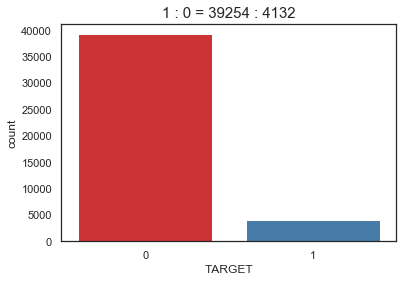

In [71]:
# 양성 클래스와 음성 클래스 갯수 확인 및 시각화
sns.countplot(y, palette='Set1')
#sns.countplot(y) 
plt.title("1 : 0 = {} : {}".format(*y.value_counts()),fontsize=15)
#plt.title("B : M = {} : {}".format(y.value_counts()[0],y.value_counts()[1]),fontsize=15)
plt.show()

In [72]:
# y를 'M':1, 'B':0으로 바꾸기
#X = X.map({'A':1,'B':2, 'C':3, 'D':4})
# 보통 binary classification 관심 레이블을 1로 둠

In [73]:
# 학습 (80%) & 검증 (10%) & 테스트 (10%) 셋으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=2017020558)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    test_size=0.5,
                                                    stratify=y_test,
                                                    shuffle=True,
                                                    random_state=2017020558)

In [74]:
# 임의의 max_depth같도록 의사결정나무분류기 생성
clf_dt = DecisionTreeClassifier(criterion='gini',#'entropy'
                                random_state=2017020558,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1)
# min_samples_split = the number of samples to split (ex) 15
# min_samples_leaf = the number of samples at a leat node (ex) 10
# 학습데이터로 모델 피팅
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2017020558, splitter='best')

In [75]:
# 학습, 검증 데이터 예측
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
confusion_matrix(y_train,y_train_pred)

array([[31024,   378],
       [ 2763,   543]], dtype=int64)

In [77]:
confusion_matrix(y_valid,y_valid_pred)

array([[3878,   48],
       [ 333,   80]], dtype=int64)

In [78]:
# 학습, 검증데이터 범주예측 결과 측정 지표 : 정확도
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
# 학습, 검증데이터 범주예측 결과 측정 지표 : f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

- Accuracy (Train)      : 0.9095
- Accuracy (Validation) : 0.9122
- F1 score (Train)      : 0.2569
- F1 score (Validation) : 0.2957


In [79]:
from IPython.display import Image
from graphviz import Source
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다.
#윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해주면 된다.

In [80]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

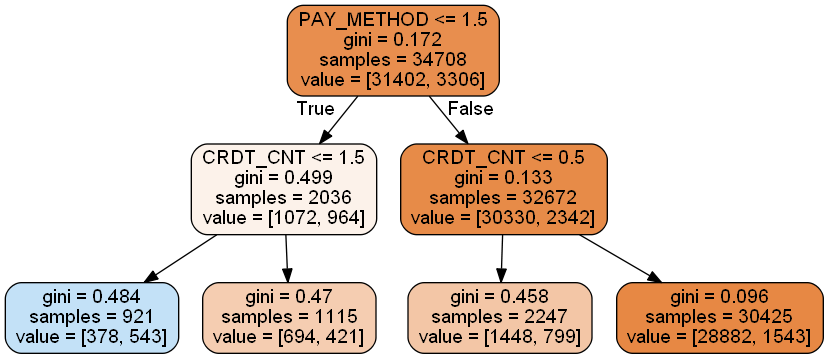

In [81]:
# export_graphviz : 의사결정나무를 DOT format으로 만들기
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,rounded=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))
# pruning이 안된 결과

In [82]:
# 가장 좋은 'max_depth' hyperparameter 값을 찾아보자
max_depths = list(range(1, 11, 1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=2017020558)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred))

C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


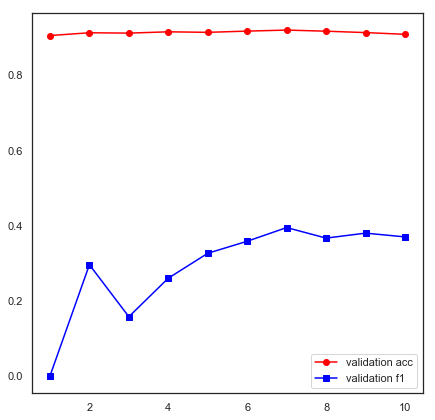

In [83]:
# 가장 좋은 'max_depth' hyperparameter 값 찾기위한 정확도, f1 그래프 그리기
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_accs, color='red', marker='o', label='validation acc')
ax.plot(max_depths, validation_f1, color='blue', marker='s', label='validation f1')
ax.legend(loc='best')
plt.show(fig)

In [84]:
best_model_idx, best_model_f1 = max(enumerate(validation_f1), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.914
- F1 score (Test) : 0.3731


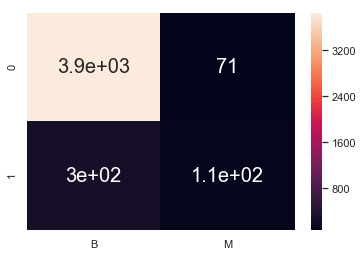

In [85]:
# Confusion matrix 그림 그려보기
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 20})

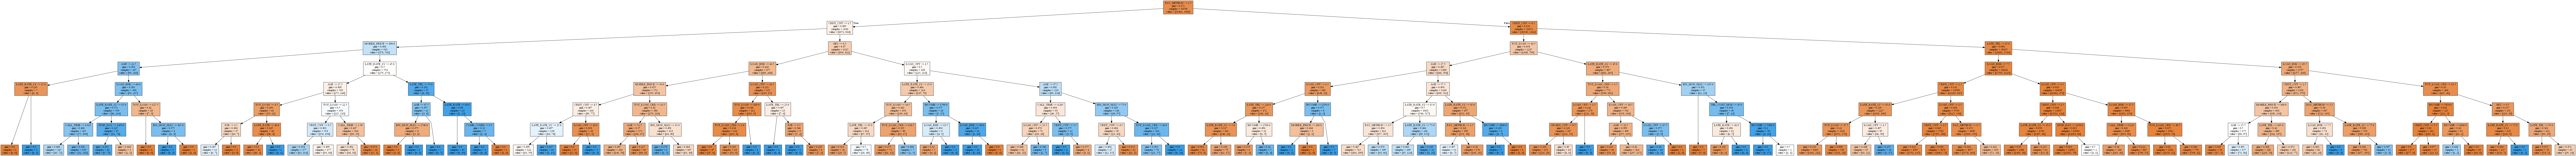

In [86]:
# Visualize the best decision tree model
graph = Source(export_graphviz(dt_models[best_model_idx],
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)

In [87]:
# 이미지 png 파일로 저장하기
with open('/loan_best.png', 'wb') as f:
    f.write(png_bytes)

PermissionError: [Errno 13] Permission denied: '/loan_best.png'

In [88]:
imp = dt_models[best_model_idx].feature_importances_

In [89]:
pd.DataFrame([X.columns, imp]).T

,0,1
0,AGE,0.0456097
1,TOT_LOAN,0.0284627
2,TOT_LOAN_CRD,0.0145189
3,LOAN_BNK,0.0528808
4,LOAN_CPT,0.037559
5,CRDT_CNT,0.269643
6,GUARN_CNT,0.00141641
7,INCOME,0.00559486
8,LOAN_CRD_CNT,0
9,LATE_RATE,0.00311348


In [90]:
# 변수 중요도 확인해보기
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] != 0])

       variables   importance
20    PAY_METHOD     0.350015
5       CRDT_CNT     0.269643
17      LATE_TEL    0.0808271
3       LOAN_BNK    0.0528808
10  LATE_RATE_1Y     0.052073
0            AGE    0.0456097
4       LOAN_CPT     0.037559
1       TOT_LOAN    0.0284627
15  MOBILE_PRICE    0.0225476
2   TOT_LOAN_CRD    0.0145189
19           SEX    0.0111529
11   INS_MON_MAX   0.00995372
13     CALL_TIME   0.00873483
7         INCOME   0.00559486
9      LATE_RATE   0.00311348
14  TEL_COST_MON   0.00183293
21           JOB   0.00169797
16      SUSP_DAY   0.00149985
6      GUARN_CNT   0.00141641
18     COMB_COMM  0.000866622


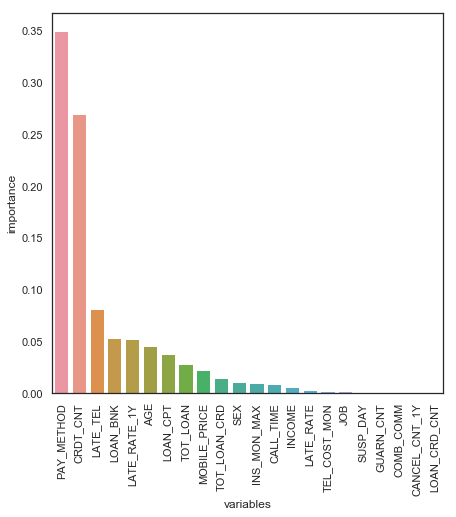

In [91]:
# 변수 중요도 그림 그리기
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90) # set property
plt.show(fig)

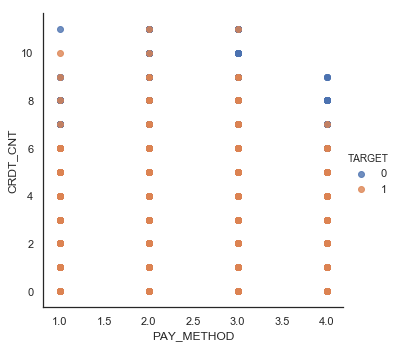

In [92]:
# 가장 중요했던 2가지 변수로 시각화 하기
sns.lmplot(x='PAY_METHOD', y='CRDT_CNT',
           hue='TARGET', data=data, fit_reg=False)